# Select Data

In [1]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

In [2]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/images

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/images


In [14]:
typdict = {'NDC':'str'}
pills = pd.read_csv('directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
pills = pills.dropna()
pills.DRUG = pills.DRUG.str.upper()
pills[['ORIG_FOLDER','IMAGES','FILENAME']] = pills.FILE.str.split('/', expand=True)
pills['FILETYPE'] = pills.FILENAME.str[-4:]
pills[pills.DRUG.str.contains('COUMADIN')]

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
6124,00056016870,1,PillProjectDisc29/images/BCD1EOPYWEOP0VIZ9L2MB...,C3PI_Reference,COUMADIN 4MG BLUE TABS,PillProjectDisc29,images,BCD1EOPYWEOP0VIZ9L2MBC5G4M7!033.CR2,.CR2
6125,00056016870,1,PillProjectDisc51/images/BXTSLR3L5BRBV!4VM7XCV...,C3PI_Reference,COUMADIN 4MG BLUE TABS,PillProjectDisc51,images,BXTSLR3L5BRBV!4VM7XCVG81Y8QWMDK.CR2,.CR2
6126,00056016870,1,PillProjectDisc15/images/B-RB3KOFSY9XY4P6DLWTJ...,C3PI_Test,COUMADIN 4MG BLUE TABS,PillProjectDisc15,images,B-RB3KOFSY9XY4P6DLWTJFE5VAU18I0.JPG,.JPG
6127,00056016870,1,PillProjectDisc19/images/B3NBP62FYAW06M24YN1ZX...,C3PI_Test,COUMADIN 4MG BLUE TABS,PillProjectDisc19,images,B3NBP62FYAW06M24YN1ZXW6-80KQFY9.WMV,.WMV
6128,00056016870,1,PillProjectDisc3/images/01J8CC__F3SK2!D-LTZI8B...,C3PI_Test,COUMADIN 4MG BLUE TABS,PillProjectDisc3,images,01J8CC__F3SK2!D-LTZI8BZ!WG-S-5.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
6356,00056018870,1,PillProjectDisc23/images/B7QZAY3WOF_I056PE5WMS...,MC_COOKED_CALIBRATED_V1.2,COUMADIN 3MG TAN TABS,PillProjectDisc23,images,B7QZAY3WOF_I056PE5WMSWTQ65DTHV9.PNG,.PNG
6357,00056018870,1,PillProjectDisc39/images/BLT776Y6RO81-WFGP57YE...,MC_COOKED_CALIBRATED_V1.2,COUMADIN 3MG TAN TABS,PillProjectDisc39,images,BLT776Y6RO81-WFGP57YEDL8LA7QL15.PNG,.PNG
6358,00056018870,1,PillProjectDisc73/images/CP9A-P9UD8YQP7FVF55T9...,MC_COOKED_CALIBRATED_V1.2,COUMADIN 3MG TAN TABS,PillProjectDisc73,images,CP9A-P9UD8YQP7FVF55T9HZ_5I_!VKL.PNG,.PNG
6359,00056018870,1,PillProjectDisc74/images/CQHP4BPTKHX41Q_IIC1CR...,MC_COOKED_CALIBRATED_V1.2,COUMADIN 3MG TAN TABS,PillProjectDisc74,images,CQHP4BPTKHX41Q_IIC1CRUJY6EJ8!Z1.PNG,.PNG


In [8]:
pills.NDC.value_counts()[:100]

00555903270    142
00555901258    142
52544029128    136
63459070160    136
00039022310    117
              ... 
00173077861     69
00093510556     69
00093512701     69
00555083202     69
00093721201     69
Name: NDC, Length: 100, dtype: int64

In [9]:
top10 = pills.NDC.value_counts()[:100]
len(top10),top10

(100,
 00555903270    142
 00555901258    142
 52544029128    136
 63459070160    136
 00039022310    117
               ... 
 00173077861     69
 00093510556     69
 00093512701     69
 00555083202     69
 00093721201     69
 Name: NDC, Length: 100, dtype: int64)

In [10]:
top10NDC = top10.index.tolist()
top10NDC

['00555903270',
 '00555901258',
 '52544029128',
 '63459070160',
 '00039022310',
 '00555903458',
 '50419040901',
 '51285011458',
 '00007365022',
 '49702020218',
 '50419010510',
 '57664010488',
 '00173024255',
 '00093725401',
 '00591554405',
 '00029316013',
 '50111039801',
 '00074611413',
 '00172496058',
 '00555099702',
 '00093213001',
 '00093293201',
 '00093213101',
 '00093226801',
 '00555032402',
 '00093071101',
 '00093010901',
 '00093720298',
 '00093111801',
 '00093112201',
 '00093013501',
 '00555048302',
 '50111046801',
 '50419040701',
 '00172375760',
 '00093106001',
 '00173076060',
 '00173075960',
 '00093312301',
 '51285009287',
 '51285008787',
 '00093220401',
 '00555902658',
 '00172409660',
 '00093525668',
 '00093106301',
 '51285006390',
 '50111032801',
 '50111043401',
 '00093737001',
 '00555901058',
 '00093403001',
 '00093081301',
 '00172409760',
 '00555901658',
 '00006071731',
 '00172436460',
 '00555901467',
 '00172208360',
 '00093317101',
 '51285009158',
 '00555900867',
 '000933

In [12]:
df = pills[pills.NDC.isin(top10NDC)]
len(df.DRUG.value_counts())

140

In [178]:
df.DRUG[df.NDC == '49702020218'] = 'COMBIVIR'

df.DRUG[df.NDC == '00555903458'] = 'BALZIVA'

df.DRUG[df.NDC == '00007365022'] = 'DYAZIDE'

df.DRUG[df.NDC == '00173024255'] = 'LANOXIN'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [179]:
df.DRUG.value_counts()

TRIVORA TAB                                 136
AMARYL 4MG TABLETS                          117
BALZIVA                                     116
NATAZIA                                     113
DYAZIDE                                     103
COMBIVIR                                     99
LANOXIN                                      99
XARELTO 20 MG TAB                            35
TRAZODONE 150MG TAB                          31
OXYCODONE AND ACETAMINOPHEN CAPSULES USP     17
Name: DRUG, dtype: int64

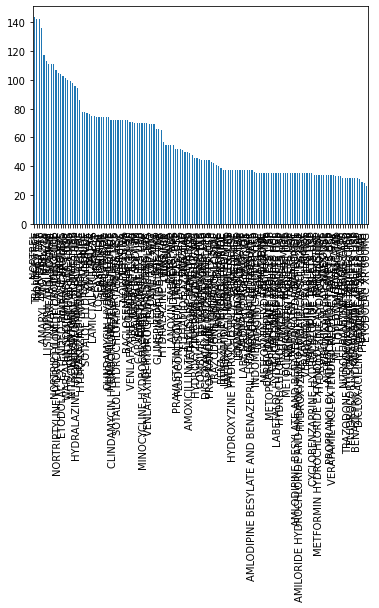

In [13]:
df.DRUG.value_counts().plot(kind='bar')

In [11]:
drugs = df.DRUG.value_counts().index.tolist()
drugs

['TRI-LEGEST',
 'NORTREL',
 'AMRIX',
 'TRIVORA',
 'AMARYL',
 'BALZIVA',
 'NATAZIA',
 'MIRCETTE',
 'DYAZIDE',
 'LANOXIN']

In [12]:
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
1783,00007365022,1,PillProjectDisc40/images/BNCP-9IQ3I-B1AK05KJGY...,C3PI_Reference,DYAZIDE,PillProjectDisc40,images,BNCP-9IQ3I-B1AK05KJGYPKFXB8Z-W9.CR2,.CR2
1784,00007365022,1,PillProjectDisc70/images/CMY2RZHAK0IQFKI-EJ91T...,C3PI_Reference,DYAZIDE,PillProjectDisc70,images,CMY2RZHAK0IQFKI-EJ91TX_KKA3OWJE.CR2,.CR2
1785,00007365022,1,PillProjectDisc77/images/CSZ5USH95QL78TU2L!U55...,C3PI_Reference,DYAZIDE,PillProjectDisc77,images,CSZ5USH95QL78TU2L!U5510IOGAASAX.CR2,.CR2
1786,00007365022,1,PillProjectDisc91/images/IXBCZI_!IQP!E9MWTSA2Y...,C3PI_Reference,DYAZIDE,PillProjectDisc91,images,IXBCZI_!IQP!E9MWTSA2YJDRIPOZAG.CR2,.CR2
1787,00007365022,1,PillProjectDisc103/images/TPEMYB_VH6IQ_M_J7D0!...,C3PI_Test,DYAZIDE,PillProjectDisc103,images,TPEMYB_VH6IQ_M_J7D0!NS2G0-P788.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
118419,63459070160,1,PillProjectDisc49/images/BVSJUMXA_2YYIA9FWAZP2...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc49,images,BVSJUMXA_2YYIA9FWAZP29031ZHTEZD.PNG,.PNG
118420,63459070160,1,PillProjectDisc57/images/CA4VW8H6_G6B36O_99TJW...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc57,images,CA4VW8H6_G6B36O_99TJW4ZGLRS3U8O.PNG,.PNG
118421,63459070160,1,PillProjectDisc90/images/I8IP8T6CW_VUGZZYPH30_...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc90,images,I8IP8T6CW_VUGZZYPH30_23W15HQT8.PNG,.PNG
118422,63459070160,1,PillProjectDisc97/images/ODUQGLEEXJEAR-FL18J81...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc97,images,ODUQGLEEXJEAR-FL18J81ALC-U55S-.PNG,.PNG


In [13]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!N0GWPVK!D6RZMO!28U2G_GBCT8YP2.JPG',
 'PillProjectDisc1/images/!P31ERRM_M7RRSPBWHL80GEAAAA6WF.JPG',
 'PillProjectDisc1/images/!XXJR-NQ-A-4POK3ZKW1CTLALT2N83.PNG',
 'PillProjectDisc1/images/!_1RYL_F1RDMPO3SRTSBK2L-G2C!KN.PNG',
 'PillProjectDisc10/images/6S1EGUCUJUCS5Y2G_PVBETH0A9X22L.JPG',
 'PillProjectDisc10/images/7!U5OIAL6W!52!L488NFS4OZ9B86QM.CR2',
 'PillProjectDisc10/images/7-UZK9UIGDQAHEGLPZ5!HYONW5F16L.JPG',
 'PillProjectDisc10/images/726N6FO55R1JXV6JSTW0Z-CWY6OBB-.JPG',
 'PillProjectDisc10/images/74!FGNH6Y6FDS8JUIFAVQ8EH0L9HM6.PNG',
 'PillProjectDisc10/images/7DS1010E8UKE890!-PPJN58F8DKF_K.JPG']

# Retrieve Data

## FTP

In [49]:
%cd ../Data/images

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/images


In [50]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/images'

In [98]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
#ftpdir

In [53]:
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        with open(value, 'wb') as fp:
            ftp.retrbinary('RETR '+ value, fp.write)

# Sort by Class (Drug)

In [29]:
import os, shutil

In [14]:
# %cd ..
# %pwd

In [20]:
df = df[df.FILETYPE != '.WMV']
df['FILENAME'] = df['FILENAME'].str.replace('.CR2','.JPG')
df['FILENAME'] = df['FILENAME'].str.replace('.PNG','.JPG')
df['FILENAME'] = df['FILENAME'].str.replace('.CR2','.PNG')
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
1783,00007365022,1,PillProjectDisc40/images/BNCP-9IQ3I-B1AK05KJGY...,C3PI_Reference,DYAZIDE,PillProjectDisc40,images,BNCP-9IQ3I-B1AK05KJGYPKFXB8Z-W9.JPG,.CR2
1784,00007365022,1,PillProjectDisc70/images/CMY2RZHAK0IQFKI-EJ91T...,C3PI_Reference,DYAZIDE,PillProjectDisc70,images,CMY2RZHAK0IQFKI-EJ91TX_KKA3OWJE.JPG,.CR2
1785,00007365022,1,PillProjectDisc77/images/CSZ5USH95QL78TU2L!U55...,C3PI_Reference,DYAZIDE,PillProjectDisc77,images,CSZ5USH95QL78TU2L!U5510IOGAASAX.JPG,.CR2
1786,00007365022,1,PillProjectDisc91/images/IXBCZI_!IQP!E9MWTSA2Y...,C3PI_Reference,DYAZIDE,PillProjectDisc91,images,IXBCZI_!IQP!E9MWTSA2YJDRIPOZAG.JPG,.CR2
1787,00007365022,1,PillProjectDisc103/images/TPEMYB_VH6IQ_M_J7D0!...,C3PI_Test,DYAZIDE,PillProjectDisc103,images,TPEMYB_VH6IQ_M_J7D0!NS2G0-P788.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
118419,63459070160,1,PillProjectDisc49/images/BVSJUMXA_2YYIA9FWAZP2...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc49,images,BVSJUMXA_2YYIA9FWAZP29031ZHTEZD.JPG,.PNG
118420,63459070160,1,PillProjectDisc57/images/CA4VW8H6_G6B36O_99TJW...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc57,images,CA4VW8H6_G6B36O_99TJW4ZGLRS3U8O.JPG,.PNG
118421,63459070160,1,PillProjectDisc90/images/I8IP8T6CW_VUGZZYPH30_...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc90,images,I8IP8T6CW_VUGZZYPH30_23W15HQT8.JPG,.PNG
118422,63459070160,1,PillProjectDisc97/images/ODUQGLEEXJEAR-FL18J81...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc97,images,ODUQGLEEXJEAR-FL18J81ALC-U55S-.JPG,.PNG


## Format all to JPG

In [21]:
df.FILETYPE.value_counts()

.JPG    748
.PNG    374
.CR2     62
Name: FILETYPE, dtype: int64

In [15]:
# from PIL import Image
# from PIL import ImageFile
# import rawpy
# import imageio
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# #os.mkdir('pills_jpg')

In [16]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/images'

In [17]:
# for filename in os.listdir():
#     if filename.endswith(".PNG") or filename.endswith(".JPG"): 
#         im1 = Image.open(r'{}'.format(filename))
#         rgb_im = im1.convert('RGB')
#         rgb_im.save(r'pills_jpg/{}''.JPG'.format(filename[:-4]))
#         continue
#     elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
#         print(filename)
#         raw = rawpy.imread('{}'.format(filename))
#         rgb = raw.postprocess()
#         imageio.imsave('pills_jpg/{}''.JPG'.format(filename[:-4]), rgb)
#         print(filename)
#         continue

In [240]:
%cd pills_jpg

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/images/pills_jpg


In [ ]:
df

In [72]:
trilegest_dir  = 'data/pills_jpg/trilegest'
nortrel_dir    = 'data/pills_jpg/nortrel'
trivora_dir    = 'data/pills_jpg/trivora'
amrix_dir      = 'data/pills_jpg/amrix'
amaryl_dir     = 'data/pills_jpg/amaryl'
balziva_dir    = 'data/pills_jpg/balziva'
natazia_dir    = 'data/pills_jpg/natazia'
mircette_dir   = 'data/pills_jpg/mircette'
dyazide_dir    = 'data/pills_jpg/dyazide'
lanoxin_dir    = 'data/pills_jpg/lanoxin'
new_dir        = 'data/pills_jpg/split/'
images         = 'data/pills_jpg'

In [248]:
os.mkdir(trilegest_dir)
os.mkdir(nortrel_dir)
os.mkdir(amrix_dir)
os.mkdir(trivora_dir)
os.mkdir(amaryl_dir)
os.mkdir(balziva_dir)
os.mkdir(natazia_dir)
os.mkdir(mircette_dir)
os.mkdir(dyazide_dir)
os.mkdir(lanoxin_dir)
os.mkdir(new_dir)

FileNotFoundError: [Errno 2] No such file or directory: 'data/pills_jpg/split/'

In [22]:
imgs_trilegest = df.FILENAME[df.DRUG == drugs[0]].tolist()
imgs_nortrel   = df.FILENAME[df.DRUG == drugs[1]].tolist()
imgs_trivora   = df.FILENAME[df.DRUG == drugs[2]].tolist()
imgs_amrix     = df.FILENAME[df.DRUG == drugs[3]].tolist()
imgs_amaryl    = df.FILENAME[df.DRUG == drugs[4]].tolist()
imgs_balziva   = df.FILENAME[df.DRUG == drugs[5]].tolist()
imgs_natazia   = df.FILENAME[df.DRUG == drugs[6]].tolist()
imgs_mircette  = df.FILENAME[df.DRUG == drugs[7]].tolist()
imgs_dyazide   = df.FILENAME[df.DRUG == drugs[8]].tolist()
imgs_lanoxin   = df.FILENAME[df.DRUG == drugs[9]].tolist()

In [140]:
df[df.DRUG == drugs[9]]

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
88176,49702020218,1,PillProjectDisc106/images/W8W8NEPVMW!42SH2AEGN...,C3PI_Reference,LANOXIN,PillProjectDisc106,images,W8W8NEPVMW!42SH2AEGNG_MF89XN6S.JPG,.CR2
88177,49702020218,1,PillProjectDisc4/images/1BIPI-1LST0RLOKX41T-4Q...,C3PI_Reference,LANOXIN,PillProjectDisc4,images,1BIPI-1LST0RLOKX41T-4QX1O6FWT8.JPG,.CR2
88178,49702020218,1,PillProjectDisc73/images/CP-P06CSPP624YK2VXVV3...,C3PI_Reference,LANOXIN,PillProjectDisc73,images,CP-P06CSPP624YK2VXVV3I-MAMFMH49.JPG,.CR2
88179,49702020218,1,PillProjectDisc86/images/EA2G!7G8HLROTTNQEMUI!...,C3PI_Reference,LANOXIN,PillProjectDisc86,images,EA2G!7G8HLROTTNQEMUI!R1-P8VBAO.JPG,.CR2
88182,49702020218,1,PillProjectDisc17/images/B1D76XI85LP71XXLALTV3...,C3PI_Test,LANOXIN,PillProjectDisc17,images,B1D76XI85LP71XXLALTV3PI3FOWAJPB.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
88270,49702020218,1,PillProjectDisc63/images/CFLEA8MMUGVR1Z6268AXU...,MC_COOKED_CALIBRATED_V1.2,LANOXIN,PillProjectDisc63,images,CFLEA8MMUGVR1Z6268AXUFUPR334I3-.JPG,.PNG
88271,49702020218,1,PillProjectDisc72/images/CO0KN8HWF-W0YN-Z-!ERU...,MC_COOKED_CALIBRATED_V1.2,LANOXIN,PillProjectDisc72,images,CO0KN8HWF-W0YN-Z-!ERU-YRFBLOA7Q.JPG,.PNG
88272,49702020218,1,PillProjectDisc89/images/HAG!YT0GY13K8ZZUQGLMG...,MC_COOKED_CALIBRATED_V1.2,LANOXIN,PillProjectDisc89,images,HAG!YT0GY13K8ZZUQGLMGDF-7H3SC0.JPG,.PNG
88273,49702020218,1,PillProjectDisc94/images/LH5N5P-LRK5L5K_7Q!YFA...,MC_COOKED_CALIBRATED_V1.2,LANOXIN,PillProjectDisc94,images,LH5N5P-LRK5L5K_7Q!YFAM0!UAGU!7.JPG,.PNG


In [23]:
druglist = [imgs_trilegest,
            imgs_nortrel, 
            imgs_trivora,
            imgs_amrix , 
            imgs_amaryl ,
            imgs_balziva,
            imgs_natazia,
            imgs_mircette,
            imgs_dyazide,
            imgs_lanoxin]

In [26]:
pathlist = [trilegest_dir,
            nortrel_dir, 
            trivora_dir,
            amrix_dir , 
            amaryl_dir ,
            balziva_dir,
            natazia_dir,
            mircette_dir,
            dyazide_dir,
            lanoxin_dir]

In [27]:
imgs_trilegest

['Z4DLBKOT9M01!1VAYS90Z2JNTMWL4.JPG',
 'CF_JAO6MOS5I_MF3S34BHXU2EDE31C5.JPG',
 'R14QTAR!--3-OW7WUTS4R8KJR6EEJ7.JPG',
 'C6WGJYSGUQC86BPC582PKB175_H9K-.JPG',
 'R3VFS_980-RWZEBEPRLGJD!8MM1WCZ.JPG',
 'BG9U2!5NY8FDAV3QZMSZZHC36!35DIA.JPG',
 'CWS7KNM2KSEVSFPHW6N12NSJH87C3P5.JPG',
 'CY0CKXUFJZZVM2RY2!DOK05G6LUL3QI.JPG',
 'Q_AHT1_VZZTFFLMWDEXE648H014NXC.JPG',
 'RH6NYS4Q20R5SGHBTQL!JMB24WMJ2J.JPG',
 '_-L!6XKOVHMA0UUQS-PJCTL1WIK!9.JPG',
 '8L6WD8U4AL0HIPFCSM6PR-HTRX7C13.JPG',
 '8P56-FO_R8US22M3_916YGK!GW6I5Y.JPG',
 '-IWS_9541TPQEOZQJQH!P7-GL6BSS9.JPG',
 'BE33TR62F3AJBS7M8Y4U!TD!TF9FM_C.JPG',
 'BKALCNUP-OHT8IBS0IN5IP4GR5HIKS4.JPG',
 'BQO69P2A6V!-O97SXH7OUGAT004QMDS.JPG',
 'BRFL2MTWD9H7LX_1LY1A-BRHST7XED4.JPG',
 'BUZEWDC648W-I2AJTB3M-TCVQNOMDSH.JPG',
 'BZ_PCT2!2A-8DTT34SVZ05AX0G5QMS2.JPG',
 'CPXCTYKN7FND9NSVAU_H12POZ782A3G.JPG',
 'CT_1DPDJMU8Q19FXFGPL7556!FZH027.JPG',
 'CZRJR0J6KR5ONGQUR2SZ37LTFX2LVU1.JPG',
 'LX6G0ZUXYV-JAHCYBNIMBD7Y3_G1D0.JPG',
 '68GQVE49V1ZGRH23QWOK5C57JUTGM.JPG',
 'S4HTWG!EQ_57X

In [127]:
%cd Computer_Vision-Medication_Identification/

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification


In [75]:
origin,destination

('data/pills_jpg/7!U5OIAL6W!52!L488NFS4OZ9B86QM.JPG',
 'data/pills_jpg/nortrel/7!U5OIAL6W!52!L488NFS4OZ9B86QM.JPG')

In [128]:
for img in imgs_trilegest:
    origin = os.path.join(images, img)
    destination = os.path.join(trilegest_dir, img)
    shutil.move(origin, 
                destination)

In [87]:
origin,destination

('data/pills_jpg/BM-E1O6QA0OX!9BRO95I872HMDYZJA5.JPG',
 'data/pills_jpg/nortrel/BM-E1O6QA0OX!9BRO95I872HMDYZJA5.JPG')

In [129]:
for img in imgs_nortrel:
    origin = os.path.join(images, img)
    destination = os.path.join(nortrel_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [130]:
for img in imgs_trivora:
    origin = os.path.join(images, img)
    destination = os.path.join(trivora_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [131]:
for img in imgs_amrix:
    origin = os.path.join(images, img)
    destination = os.path.join(amrix_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [132]:
for img in imgs_amaryl:
    origin = os.path.join(images, img)
    destination = os.path.join(amaryl_dir, img)
    shutil.move(origin, 
                destination)

In [133]:
for img in imgs_balziva:
    origin = os.path.join(images, img)
    destination = os.path.join(balziva_dir, img)
    shutil.move(origin, 
                destination)

In [134]:
for img in imgs_natazia:
    origin = os.path.join(images, img)
    destination = os.path.join(natazia_dir, img)
    shutil.move(origin, 
                destination)

In [135]:
for img in imgs_mircette:
    origin = os.path.join(images, img)
    destination = os.path.join(mircette_dir, img)
    shutil.move(origin, 
                destination)

In [136]:
for img in imgs_dyazide:
    origin = os.path.join(images, img)
    destination = os.path.join(dyazide_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [137]:
for img in imgs_lanoxin:
    origin = os.path.join(images, img)
    destination = os.path.join(lanoxin_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [177]:
movedrugs

In [122]:
train_folder = os.path.join(new_dir, 'train')
train_nortel = os.path.join(train_folder, 'NORTREL')
train_amrix = os.path.join(train_folder, 'AMRIX')
train_trivora = os.path.join(train_folder, 'TRIVORA')
train_amaryl = os.path.join(train_folder, 'AMARYL')
train_balziva = os.path.join(train_folder, 'BALZIVA')
train_natazia = os.path.join(train_folder, 'NATAZIA')
train_mircette = os.path.join(train_folder, 'MIRCETTE')
train_dyazide = os.path.join(train_folder, 'DYAZIDE')
train_lanoxin = os.path.join(train_folder, 'LANOXIN')
train_trilegest = os.path.join(train_folder, 'TRI-LEGEST')

test_folder = os.path.join(new_dir, 'test')
test_nortel = os.path.join(test_folder, 'NORTREL')
test_amrix = os.path.join(test_folder, 'AMRIX')
test_trivora = os.path.join(test_folder, 'TRIVORA')
test_amaryl = os.path.join(test_folder, 'AMARYL')
test_balziva = os.path.join(test_folder, 'BALZIVA')
test_natazia = os.path.join(test_folder, 'NATAZIA')
test_mircette = os.path.join(test_folder, 'MIRCETTE')
test_dyazide = os.path.join(test_folder, 'DYAZIDE')
test_lanoxin = os.path.join(test_folder, 'LANOXIN')
test_trilegest = os.path.join(test_folder, 'TRI-LEGEST')


val_folder = os.path.join(new_dir, 'validation')
val_nortel = os.path.join(val_folder, 'NORTREL')
val_amrix = os.path.join(val_folder, 'AMRIX')
val_trivora = os.path.join(val_folder, 'TRIVORA')
val_amaryl = os.path.join(val_folder, 'AMARYL')
val_balziva = os.path.join(val_folder, 'BALZIVA')
val_natazia = os.path.join(val_folder, 'NATAZIA')
val_mircette = os.path.join(val_folder, 'MIRCETTE')
val_dyazide = os.path.join(val_folder, 'DYAZIDE')
val_lanoxin = os.path.join(val_folder, 'LANOXIN')
val_trilegest = os.path.join(val_folder, 'TRI-LEGEST')

In [123]:
os.mkdir(test_folder)
os.mkdir(test_nortrel)
os.mkdir(test_amrix)
os.mkdir(test_trivora)
os.mkdir(test_amaryl)
os.mkdir(test_balziva)
os.mkdir(test_natazia)
os.mkdir(test_mircette)
os.mkdir(test_dyazide)
os.mkdir(test_lanoxin)
os.mkdir(test_trilegest)

os.mkdir(train_folder)
os.mkdir(train_nortrel)
os.mkdir(train_amrix)
os.mkdir(train_trivora)
os.mkdir(train_amaryl)
os.mkdir(train_balziva)
os.mkdir(train_natazia)
os.mkdir(train_mircette)
os.mkdir(train_dyazide)
os.mkdir(train_lanoxin)
os.mkdir(train_trilegest)

os.mkdir(val_folder)
os.mkdir(val_nortrel)
os.mkdir(val_amrix)
os.mkdir(val_trivora)
os.mkdir(val_amaryl)
os.mkdir(val_balziva)
os.mkdir(val_natazia)
os.mkdir(val_mircette)
os.mkdir(val_dyazide)
os.mkdir(val_lanoxin)
os.mkdir(val_trilegest)

FileNotFoundError: [Errno 2] No such file or directory: 'data/pills_jpg/split/test'

In [82]:
#drugs

In [90]:
%pwd

'/Users/alphonsowoodbury/Projects'

In [91]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification


In [86]:
images

'data/images'

In [93]:
imgs_nortela = imgs_trilegest[:90]
for img in imgs_nortela:
    origin = os.path.join(images, img)
    destination = os.path.join(trilegest_dir, img)
    shutil.move(origin, 
                destination)

In [71]:
img

'CVCFM3B4PL!67K921BF!G_7NVWYAN4X.PNG'

In [72]:
origin

'data/images/CVCFM3B4PL!67K921BF!G_7NVWYAN4X.PNG'

In [73]:
destination

'data/split/train/LANOXIN/CVCFM3B4PL!67K921BF!G_7NVWYAN4X.PNG'

In [124]:
df[df.FILENAME == '-WT_RX0KVFC9BH0ZFM643W5SJMZL!1.JPG']

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
88198,49702020218,1,PillProjectDisc3/images/-WT_RX0KVFC9BH0ZFM643W...,C3PI_Test,LANOXIN,PillProjectDisc3,images,-WT_RX0KVFC9BH0ZFM643W5SJMZL!1.JPG,.JPG
88199,49702020218,1,PillProjectDisc3/images/-WT_RX0KVFC9BH0ZFM643W...,C3PI_Test,LANOXIN,PillProjectDisc3,images,-WT_RX0KVFC9BH0ZFM643W5SJMZL!1.JPG,.JPG


In [148]:
riz = pills[pills.DRUG.str.contains('RIZA')]
riz.NDC.value_counts()

00173080661    37
51991036378    17
33342009407    17
33342008852    17
00093747243    17
00093747143    17
60505372301    17
23155024546    17
00781542606    17
53451010101    17
51991035478    17
Name: NDC, dtype: int64

In [ ]:
# train santa
imgs = imgs_santa[:271]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(train_santa, img)
    shutil.copyfile(origin, destination)

In [ ]:
# validation santa
imgs = imgs_santa[271:371]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(val_santa, img)
    shutil.copyfile(origin, destination)

In [ ]:
# test santa
imgs = imgs_santa[371:]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(test_santa, img)
    shutil.copyfile(origin, destination)

# Prep Images

## Augmentation